# PROJECT_01 - PART-2

## Importing libraries

In [4]:
import pandas as pd
import numpy as np
from openpyxl import load_workbook
from openpyxl import Workbook

#### explaination

## Importing dataset

In [8]:
file_path = 'CB.xlsx'

# Loading the sheets into DataFrames
df_acquisition = pd.read_excel(file_path, sheet_name='Customer Acqusition')
df_spend = pd.read_excel(file_path, sheet_name='Spend')
df_repayment = pd.read_excel(file_path, sheet_name='Repayment')

#### explaination

## Sanity Checks – Data Cleaning

In [12]:
# Note – All tasks need to be completed for month basis i.e. write logic for monthly calculations not cumulative for entire period.
# avoid a meaningful treatment to all values where age is less than 18.
# Is there any customer who have spent more than his/her Credit Limit for any particular month.

In [14]:
# Credit card can be used by users whose age is >=18 , but the dataset contains ages which are <18 ;
# We could've avoided them but ther are relatively more than the value that can e ignored
# so we Replace ages less than 18 with the mean age of all other customers.

## VISUALISATION

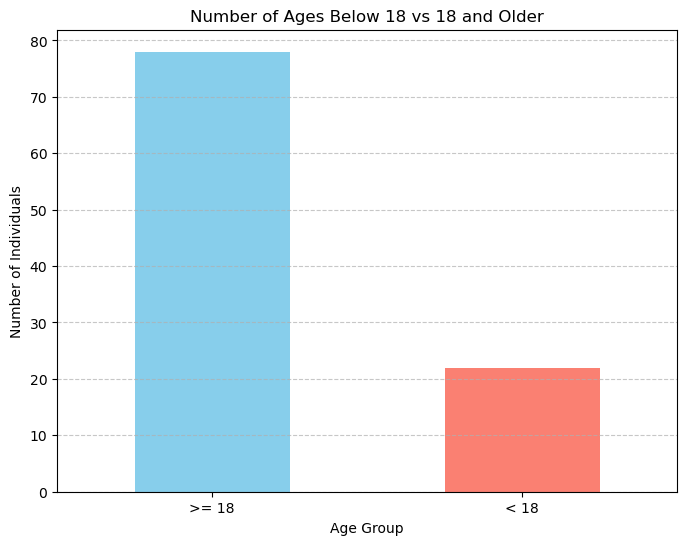

In [17]:
import matplotlib.pyplot as plt

# Assuming df_acquisition is already defined and contains the 'Age' column

# Count the number of ages below 18 and ages 18 and older
age_counts = df_acquisition['Age'].apply(lambda x: '< 18' if x < 18 else '>= 18').value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Ages Below 18 vs 18 and Older')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### explaination

#### Replacing ages less than 18 with the mean age of all other customers.

In [21]:
mean_age = df_acquisition[df_acquisition['Age'] >= 18]['Age'].mean()
df_acquisition['Age'] = df_acquisition['Age'].apply(lambda x: mean_age if x < 18 else x)

#### explaination

## VISUALISATION

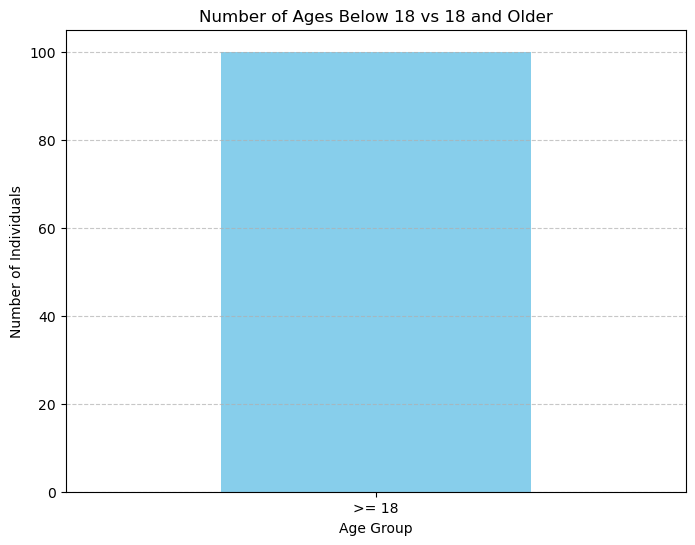

In [25]:
# Assuming df_acquisition is already defined and contains the 'Age' column

# Count the number of ages below 18 and ages 18 and older
age_counts = df_acquisition['Age'].apply(lambda x: '< 18' if x < 18 else '>= 18').value_counts()

# Create a bar chart
plt.figure(figsize=(8, 6))
age_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Number of Ages Below 18 vs 18 and Older')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<------------------------------------------------------------------>

# TASKS

### 1. Monthly Spend of Each Customer

#### Calculating monthly spend

In [31]:
monthly_spend = df_spend.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_spend = monthly_spend.rename(columns={'Amount': 'Monthly Spend'})

#### explaination

## VISUALISATION

### For demonstration, we'll plot the data for the first 5 customers

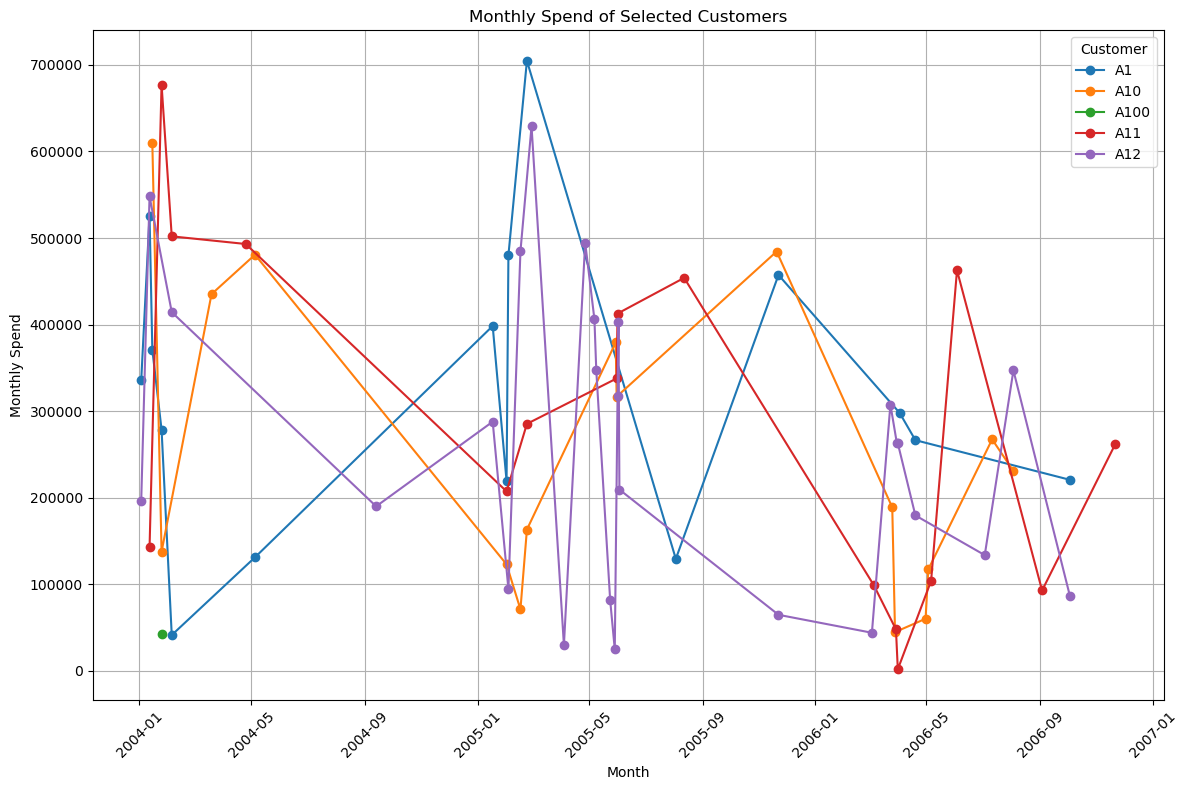

In [36]:
# Select 5 customers (e.g., the first 5 unique customers)
selected_customers = monthly_spend['Costomer'].unique()[:5]

# Filter data for these 5 customers
filtered_data = monthly_spend[monthly_spend['Costomer'].isin(selected_customers)]

# Plotting
plt.figure(figsize=(12, 8))

for customer in selected_customers:
    customer_data = filtered_data[filtered_data['Costomer'] == customer]
    plt.plot(customer_data['Month'], customer_data['Monthly Spend'], marker='o', label=customer)

plt.title('Monthly Spend of Selected Customers')
plt.xlabel('Month')
plt.ylabel('Monthly Spend')
plt.legend(title='Customer')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    monthly_spend.to_excel(writer, sheet_name='Monthly Spend', index=False)

#### explaination

### 2. Monthly Repayment of Each Customer

In [42]:
#### Calculating monthly repayment

In [44]:
monthly_repayment = df_repayment.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_repayment = monthly_repayment.rename(columns={'Amount': 'Monthly Repayment'})

#### explaination

## VISUALISATION

### For demonstration, we'll plot the data for the first 5 customers

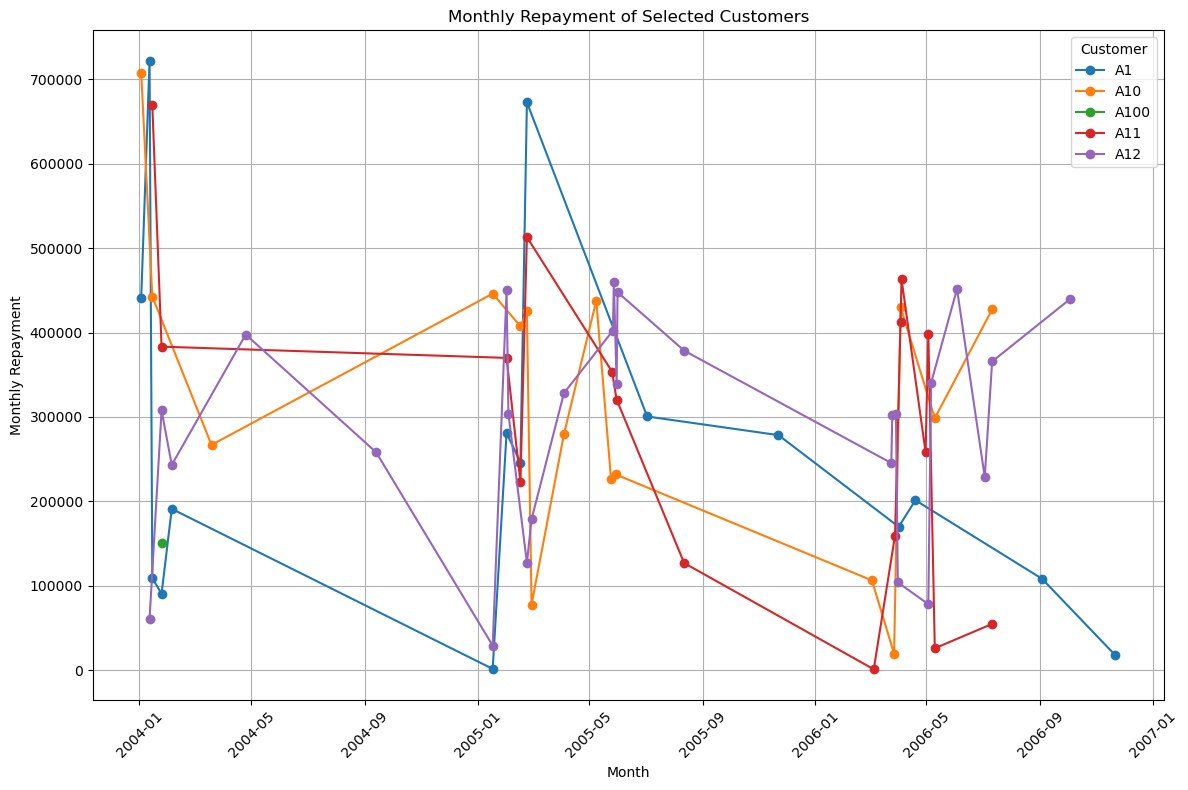

In [49]:

# Select 5 customers (e.g., the first 5 unique customers)
selected_customers = monthly_repayment['Costomer'].unique()[:5]

# Filter data for these 5 customers
filtered_data = monthly_repayment[monthly_repayment['Costomer'].isin(selected_customers)]

# Plotting
plt.figure(figsize=(12, 8))

for customer in selected_customers:
    customer_data = filtered_data[filtered_data['Costomer'] == customer]
    plt.plot(customer_data['Month'], customer_data['Monthly Repayment'], marker='o', label=customer)

plt.title('Monthly Repayment of Selected Customers')
plt.xlabel('Month')
plt.ylabel('Monthly Repayment')
plt.legend(title='Customer')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    monthly_repayment.to_excel(writer, sheet_name='Monthly Repayment', index=False)

#### explaination

### 3. Highest Paying 10 Customers

In [55]:
# Total spend per customer
total_spend = df_spend.groupby('Costomer')['Amount'].sum().reset_index()
top_10_customers = total_spend.sort_values(by='Amount', ascending=False).head(10).rename(columns={'Amount': 'Total Spend'})

#### explaination

## VISUALISATION

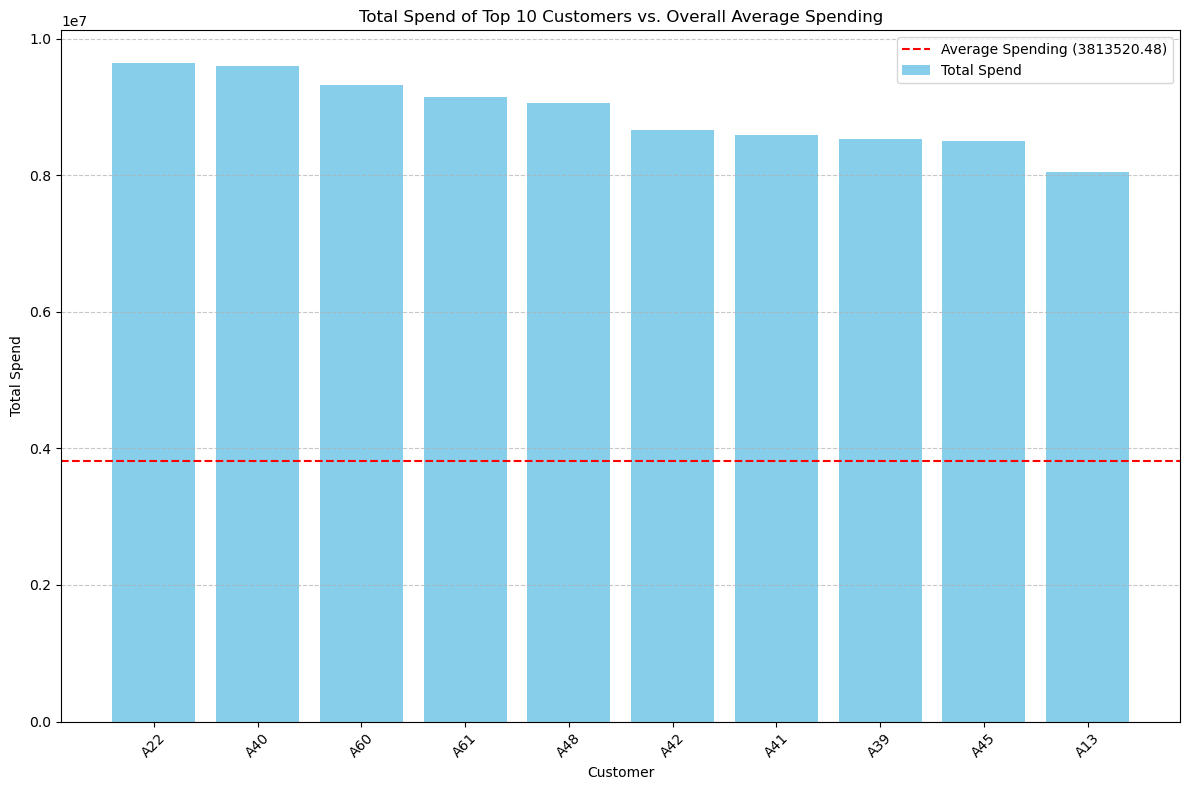

In [59]:
# Calculate the average spending of all customers
overall_average_spending = total_spend['Amount'].mean()

# Plotting
plt.figure(figsize=(12, 8))

# Plot the total spend for each of the top 10 customers
plt.bar(top_10_customers['Costomer'], top_10_customers['Total Spend'], color='skyblue', label='Total Spend')

# Add a horizontal line for the average spending of all customers
plt.axhline(y=overall_average_spending, color='red', linestyle='--', label=f'Average Spending ({overall_average_spending:.2f})')

plt.title('Total Spend of Top 10 Customers vs. Overall Average Spending')
plt.xlabel('Customer')
plt.ylabel('Total Spend')
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    top_10_customers.to_excel(writer, sheet_name='Top 10 Customers', index=False)

#### explaination

### 4. Spending by Segment

In [65]:
df_spend_acquisition = df_spend.merge(df_acquisition[['Customer', 'Segment']], left_on='Costomer', right_on='Customer')
segment_spending = df_spend_acquisition.groupby('Segment')['Amount'].sum().reset_index()
segment_spending = segment_spending.rename(columns={'Amount': 'Total Spending'})

#### explaination

## VISUALISATION

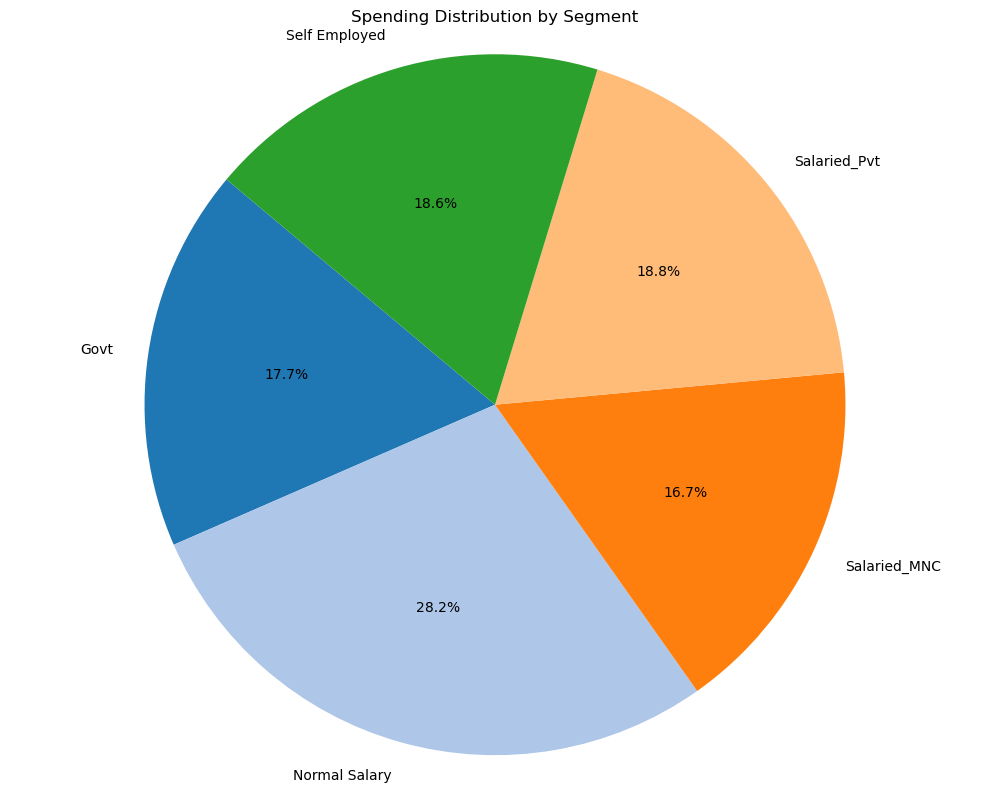

In [69]:
# Plotting
plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(segment_spending['Total Spending'], 
        labels=segment_spending['Segment'], 
        autopct='%1.1f%%', 
        colors=plt.get_cmap('tab20').colors, 
        startangle=140)

plt.title('Spending Distribution by Segment')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    segment_spending.to_excel(writer, sheet_name='Spending by Segment', index=False)

#### explaination

### 5. Spending by Age Group

#### Adding Age Group column

In [76]:
bins = [0, 18, 30, 45, 60, 100]
labels = ['<18', '18-30', '31-45', '46-60', '60+']
df_acquisition['Age Group'] = pd.cut(df_acquisition['Age'], bins=bins, labels=labels)
df_spend_acquisition = df_spend.merge(df_acquisition[['Customer', 'Age Group']], left_on='Costomer', right_on='Customer')
age_group_spending = df_spend_acquisition.groupby('Age Group')['Amount'].sum().reset_index()
age_group_spending = age_group_spending.rename(columns={'Amount': 'Total Spending'})

/var/folders/pn/d0x5whnx06nf2m3tybgx7k8w0000gn/T/ipykernel_16911/2883420207.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_spending = df_spend_acquisition.groupby('Age Group')['Amount'].sum().reset_index()


#### explaination

## VISUALISATION

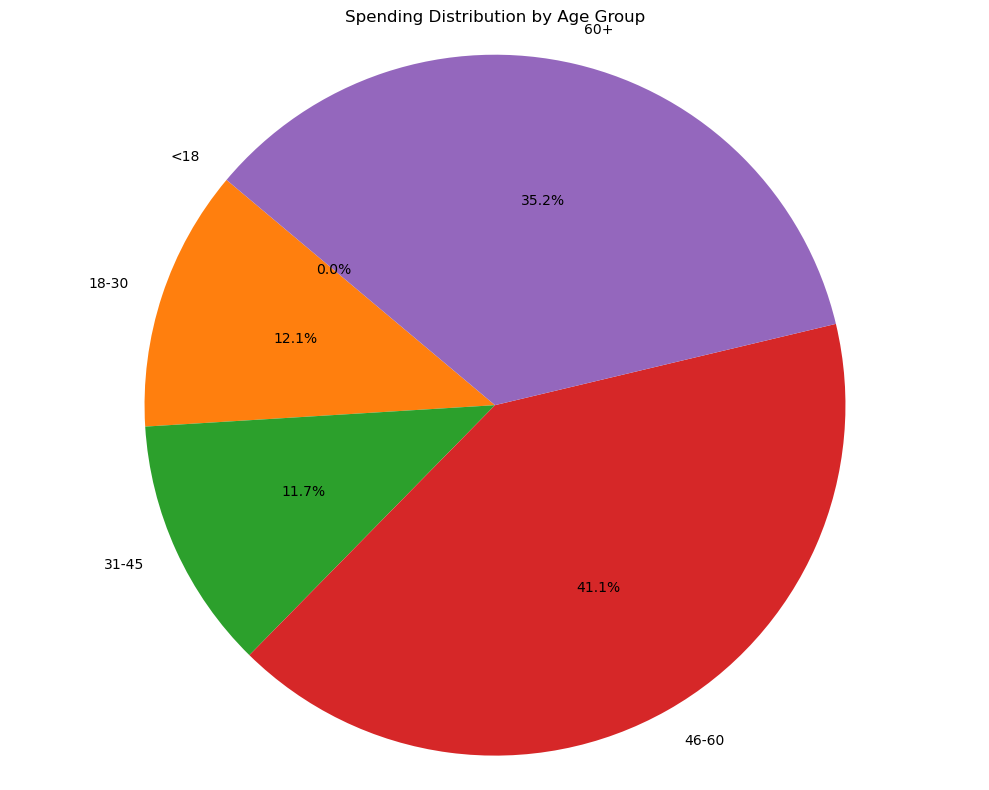

In [80]:
# Plotting
plt.figure(figsize=(10, 8))

# Create a pie chart
plt.pie(age_group_spending['Total Spending'], 
        labels=age_group_spending['Age Group'], 
        autopct='%1.1f%%', 
        colors=plt.get_cmap('tab10').colors, 
        startangle=140)

plt.title('Spending Distribution by Age Group')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()
plt.show()

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    age_group_spending.to_excel(writer, sheet_name='Spending by Age Group', index=False)

#### explaination

### 6. Most Profitable Segment

In [85]:
# Profitability here can be considered as the difference between total spending and total repayments.

#### Merging spend and repayment data

In [88]:
df_repayment_acquisition = df_repayment.merge(df_acquisition[['Customer', 'Segment']], left_on='Costomer', right_on='Customer')
df_spend_repayment = df_spend_acquisition.merge(df_repayment_acquisition, on=['Costomer', 'Month'], how='left')

#### explaination

#### Calculating profitability

In [92]:
# Filling NaN values in repayment amount with 0
df_spend_repayment['Amount_repayment'] = df_spend_repayment['Amount_y'].fillna(0)

# Calculating profit
df_spend_repayment['Profit'] = df_spend_repayment['Amount_x'] - df_spend_repayment['Amount_repayment']

#### explaination

In [95]:
# Merging with acquisition data to include segments
df_spend_repayment = df_spend_repayment.merge(df_acquisition[['Customer', 'Segment']], left_on='Costomer', right_on='Customer')

#### explaination

In [98]:
# Rename columns for consistency
df_spend_repayment = df_spend_repayment.rename(columns={
    'Amount_x': 'Amount', 
    'Amount_y': 'Repayment', 
    'Segment': 'Segment_x'
})

#### explaination

In [101]:
# Calculate Due Amount and Profit
df_spend_repayment['Due Amount'] = df_spend_repayment['Amount'] - df_spend_repayment['Repayment'].fillna(0)
df_spend_repayment['Interest'] = df_spend_repayment['Due Amount'] * 0.029
df_spend_repayment['Profit'] = df_spend_repayment['Amount'] - df_spend_repayment['Repayment'].fillna(0) + df_spend_repayment['Interest']

#### explaination

In [104]:
# Calculate profitability by segment using the correct 'Segment' column
segment_profitability = df_spend_repayment.groupby('Segment_x')['Profit'].sum().reset_index()
segment_profitability = segment_profitability.rename(columns={'Profit': 'Total Profit'})

#### explaination

## VISUALISATION

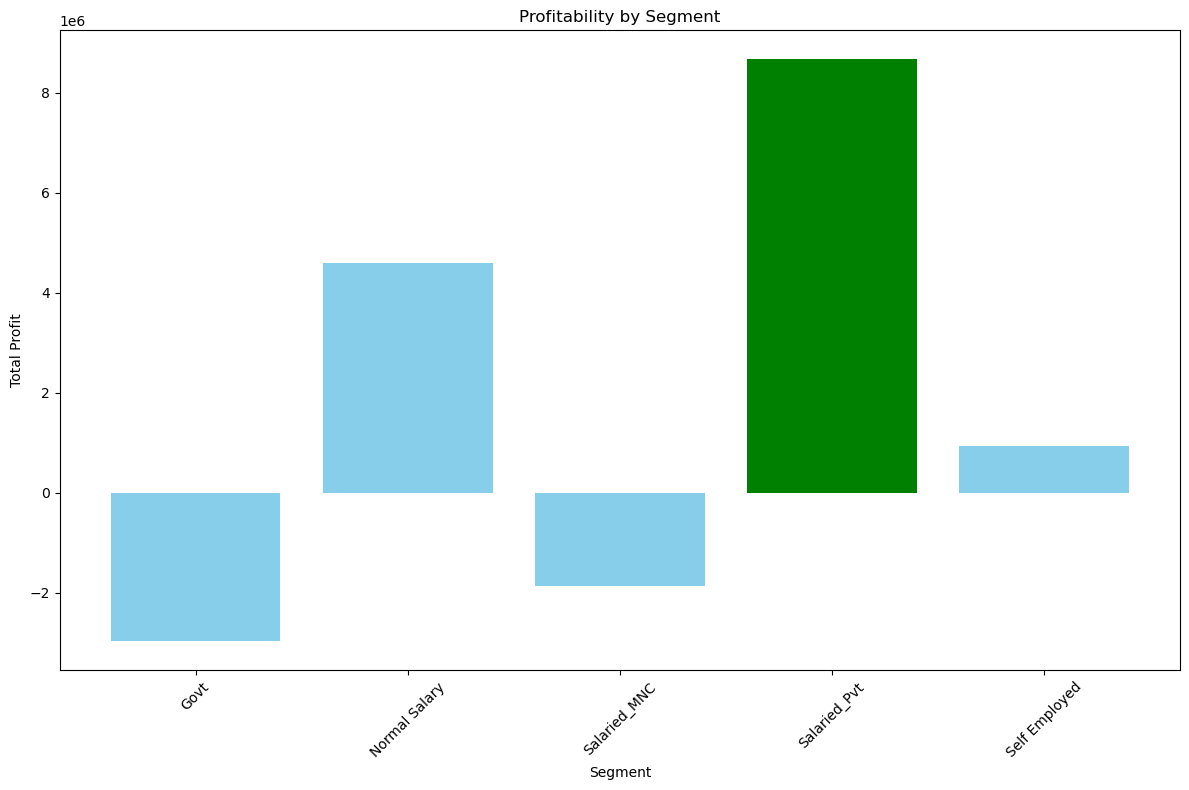

In [108]:
# Identify the most profitable segment
most_profitable_segment = segment_profitability.loc[segment_profitability['Total Profit'].idxmax()]

# Plotting
plt.figure(figsize=(12, 8))

# Bar colors based on whether they are the most profitable segment
colors = ['green' if segment == most_profitable_segment['Segment_x'] else 'skyblue' for segment in segment_profitability['Segment_x']]

# Create the bar plot
plt.bar(segment_profitability['Segment_x'], segment_profitability['Total Profit'], color=colors)

# Add labels and title
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.title('Profitability by Segment')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

In [110]:
# SOME SEGMENTS ARE SHOWING NEGATIVE PROFIT AS WELL [ I.E. , LOSS]

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    segment_profitability.to_excel(writer, sheet_name='Segment Profitability', index=False)

#### explaination

### 7. Spending by Category

In [116]:
category_spending = df_spend.groupby('Type')['Amount'].sum().reset_index()
category_spending = category_spending.rename(columns={'Amount': 'Total Spending'})

#### explaination

## VISUALISATION

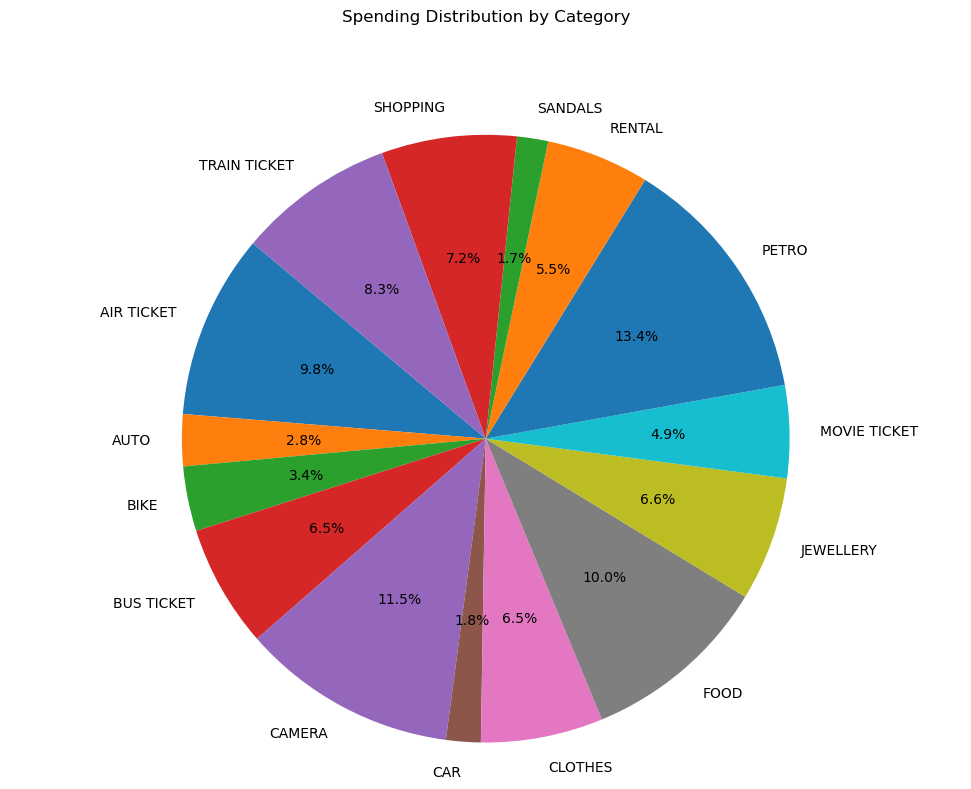

In [120]:
# Plotting
plt.figure(figsize=(10, 8))

# Create the pie chart
plt.pie(category_spending['Total Spending'], 
        labels=category_spending['Type'], 
        autopct='%1.1f%%', 
        colors=plt.get_cmap('tab10').colors, 
        startangle=140)

# Add a title with some space above the chart
plt.title('Spending Distribution by Category', pad=60)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the plot
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    category_spending.to_excel(writer, sheet_name='Spending by Category', index=False)

#### explaination

### 8. Impose an interest rate of 2.9% for each customer for any due amount.

#### Calculating due amounts

In [127]:
df_spend_repayment['Due Amount'] = df_spend_repayment['Amount'] - df_spend_repayment['Repayment'].fillna(0)
df_spend_repayment['Interest'] = df_spend_repayment['Due Amount'] * 0.029

#### explaination

## VISUALISATION

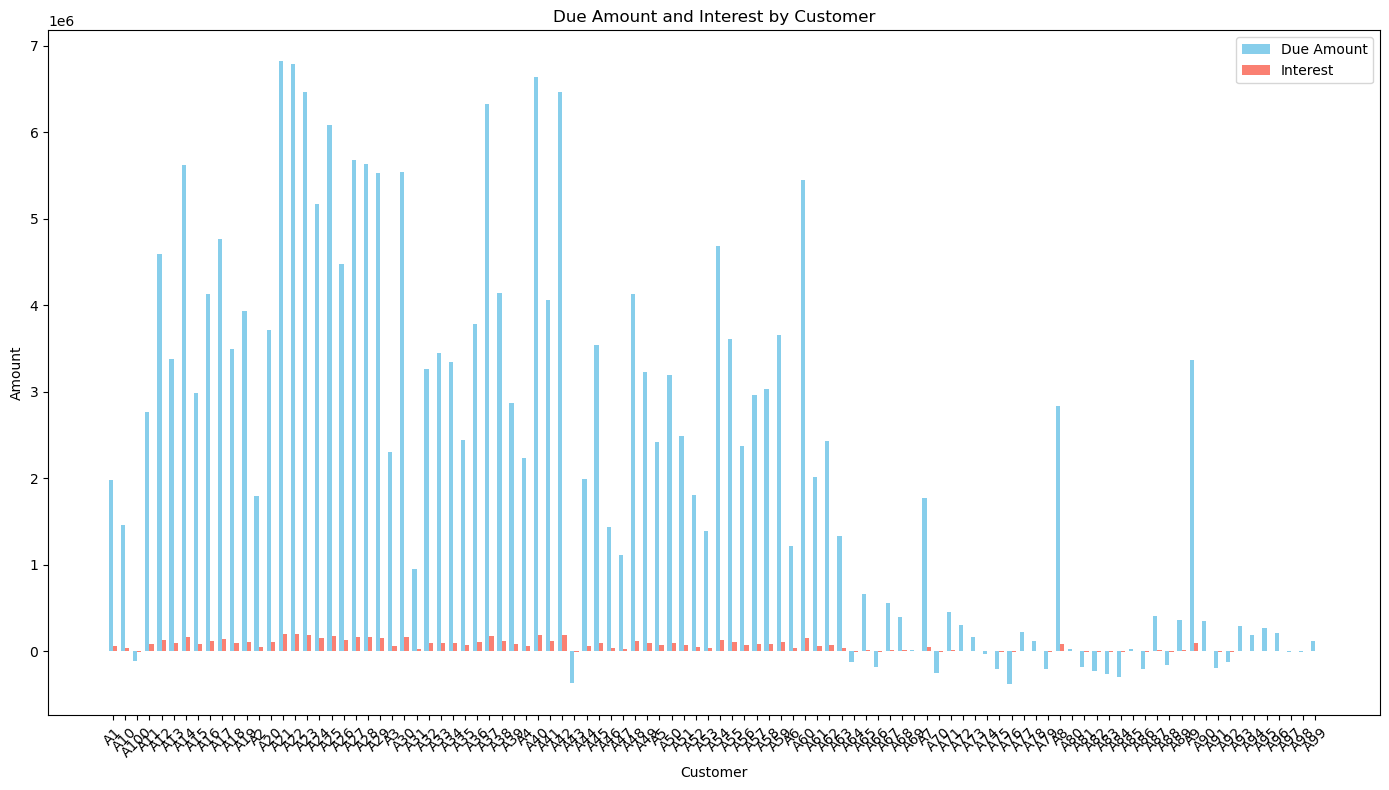

In [131]:

# Aggregate data to show a summary for visualization
# Grouping by customer to get the total due amount and interest per customer
customer_summary = df_spend_repayment.groupby('Costomer').agg({'Due Amount': 'sum', 'Interest': 'sum'}).reset_index()

# Plotting
plt.figure(figsize=(14, 8))

# Plotting Due Amount and Interest side by side for each customer
bar_width = 0.35
index = range(len(customer_summary))

plt.bar(index, customer_summary['Due Amount'], bar_width, label='Due Amount', color='skyblue')
plt.bar([i + bar_width for i in index], customer_summary['Interest'], bar_width, label='Interest', color='salmon')

# Adding labels and title
plt.xlabel('Customer')
plt.ylabel('Amount')
plt.title('Due Amount and Interest by Customer')
plt.xticks([i + bar_width / 2 for i in index], customer_summary['Costomer'], rotation=45)
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    df_spend_repayment.to_excel(writer, sheet_name='Customer Interest', index=False)

#### explaination

### 9. Monthly Profit for the Bank

In [137]:
df_spend_repayment['Monthly Profit'] = df_spend_repayment['Amount'] - df_spend_repayment['Repayment'].fillna(0) + df_spend_repayment['Interest']

#### explaination

#### Calculate Monthly Profit by Month

In [141]:
monthly_profit = df_spend_repayment.groupby('Month')['Monthly Profit'].sum().reset_index()
monthly_profit = monthly_profit.rename(columns={'Monthly Profit': 'Total Monthly Profit'})

#### explaination

## VISUALISATION

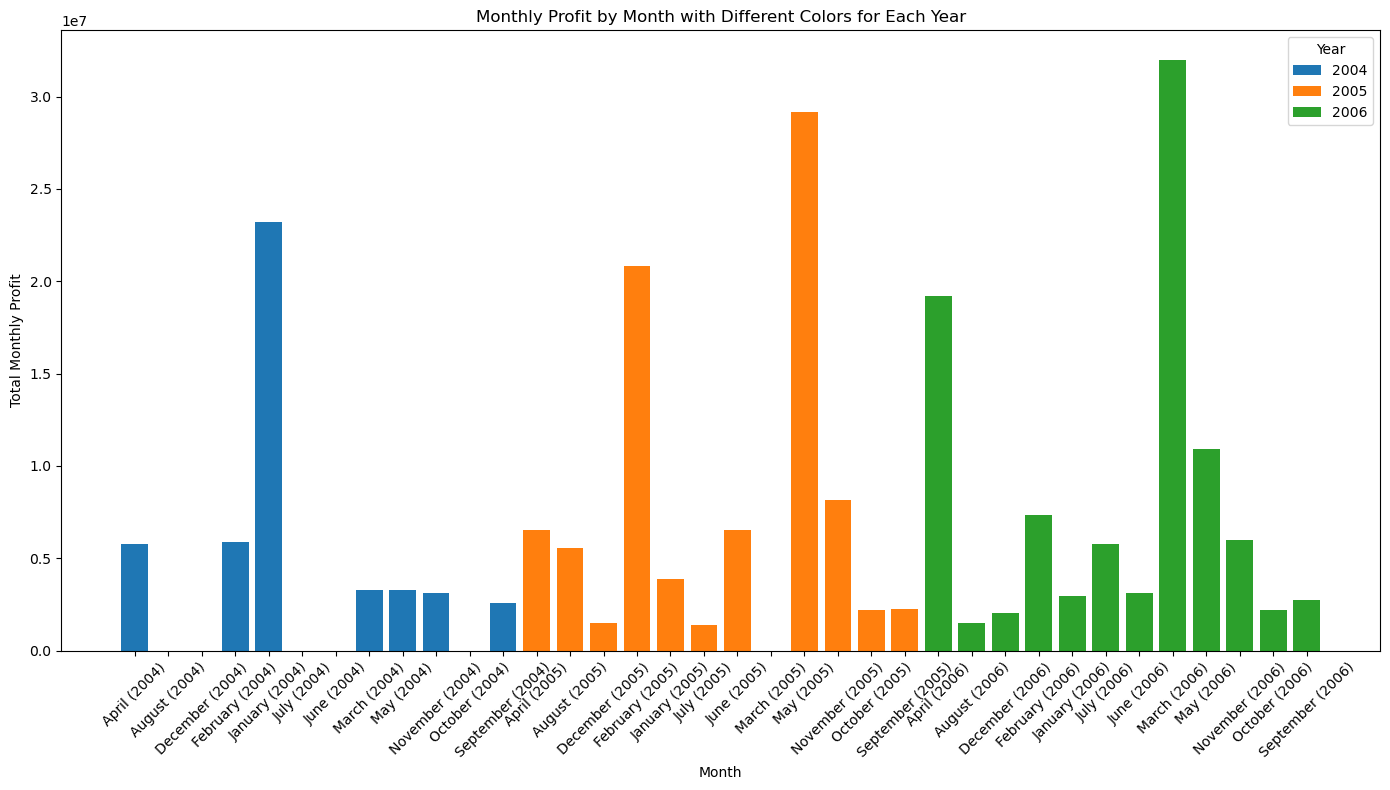

In [145]:

# Convert 'Month' column to datetime format
df_spend_repayment['Month'] = pd.to_datetime(df_spend_repayment['Month'])

# Extract year and month for grouping
df_spend_repayment['Year'] = df_spend_repayment['Month'].dt.year
df_spend_repayment['MonthName'] = df_spend_repayment['Month'].dt.strftime('%B')

# Group by month and year to aggregate monthly profits
monthly_profit = df_spend_repayment.groupby(['MonthName', 'Year'])['Monthly Profit'].sum().unstack()

# Plotting
plt.figure(figsize=(14, 8))

# Plot each year with a different color
colors = plt.get_cmap('tab10').colors
years = monthly_profit.columns
for i, year in enumerate(years):
    plt.bar(monthly_profit.index + f' ({year})', monthly_profit[year], color=colors[i % len(colors)], label=year)

# Adding labels and title
plt.xlabel('Month')
plt.ylabel('Total Monthly Profit')
plt.title('Monthly Profit by Month with Different Colors for Each Year')
plt.xticks(rotation=45)
plt.legend(title='Year')

# Show the plot
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    monthly_profit.to_excel(writer, sheet_name='Monthly Profit', index=False)

#### explaination

### !!! - Is there any customer who have spent more than his/her Credit Limit for any particular month.

In [151]:
# Merging Spend DataFrame with Acquisition DataFrame to get credit limit
df_spend_acquisition = pd.merge(df_spend, df_acquisition[['Customer', 'Limit']], left_on='Costomer', right_on='Customer')

#### explaination

In [154]:
# Checking if any spend exceeds the credit limit
# Filling NaN limits with 0 for safety
df_spend_acquisition['Limit'] = df_spend_acquisition['Limit'].fillna(0)
df_spend_acquisition['Exceeded Limit'] = df_spend_acquisition['Amount'] > df_spend_acquisition['Limit']

#### explaination

In [157]:
# Filtering customers who have exceeded their credit limit
customers_exceeded_limit = df_spend_acquisition[df_spend_acquisition['Exceeded Limit']]

#### explaination

## VISUALISATION

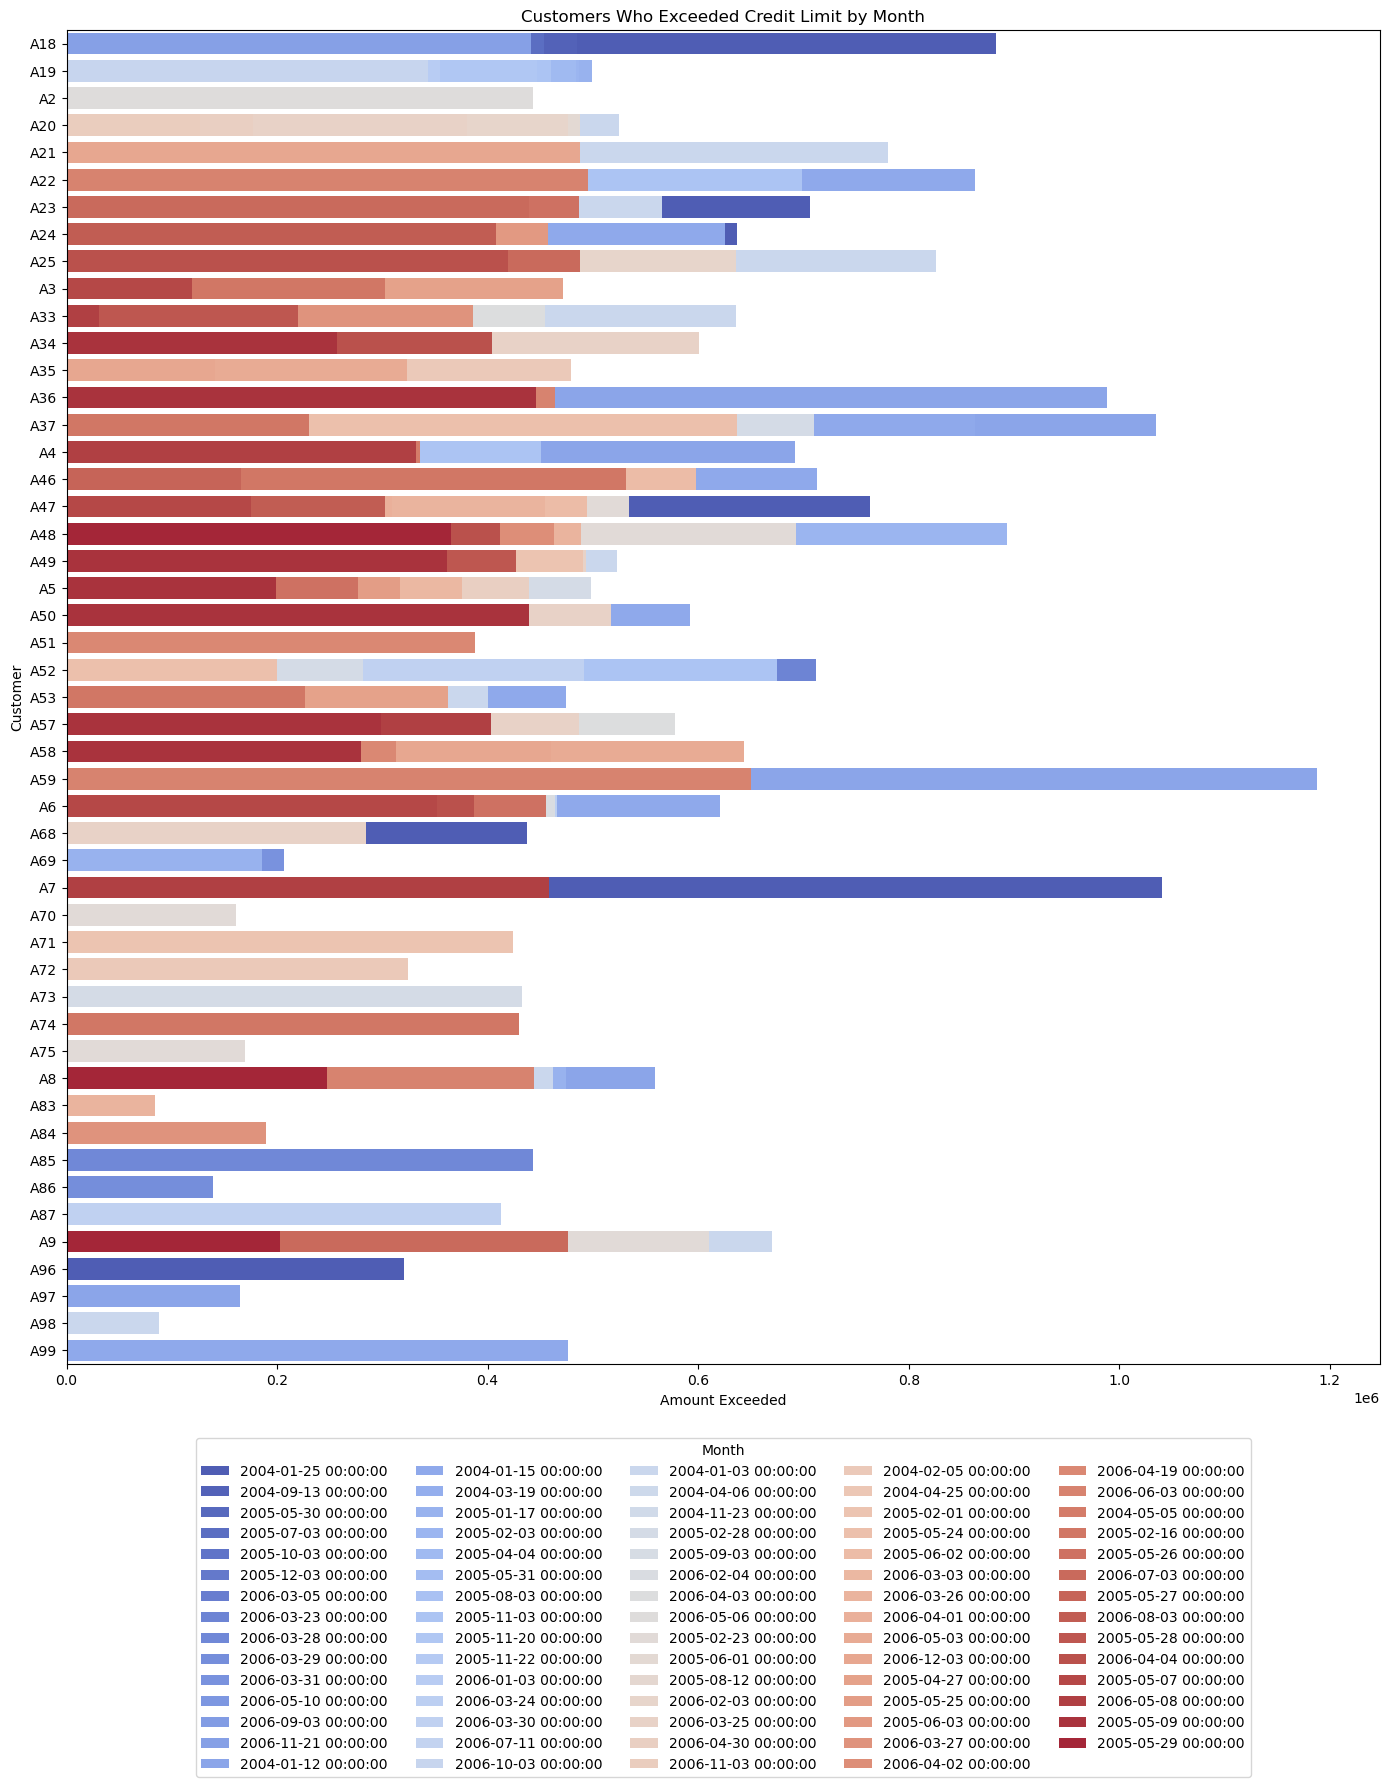

In [167]:
import seaborn as sns


# Group data by customer and month to get total amounts and months where limits were exceeded
grouped_data = customers_exceeded_limit.groupby(['Costomer', 'Month']).agg({
    'Amount': 'sum',
    'Exceeded Limit': 'max'
}).reset_index()

# Plotting
plt.figure(figsize=(14, 18))

# Creating a bar plot with customer names and months
sns.barplot(data=grouped_data, x='Amount', y='Costomer', hue='Month', dodge=False, palette='coolwarm')

# Adding labels and title
plt.xlabel('Amount Exceeded')
plt.ylabel('Customer')
plt.title('Customers Who Exceeded Credit Limit by Month')

# Customizing legend to be horizontal
plt.legend(title='Month', bbox_to_anchor=(0.5, -0.05), loc='upper center', ncol=5)

# Show plot
plt.tight_layout()
plt.show()

#### explaination

#### Writing to a new sheet

In [ ]:
with pd.ExcelWriter(file_path, mode='a', engine='openpyxl') as writer:
    customers_exceeded_limit.to_excel(writer, sheet_name='Exceeded Limit', index=False)

#### explaination

<------------------------------------------------------------------------------------------------------------------>

# THANK YOU !!